In [24]:
import os
data_path='/Users/liubo/Science_dataset/DogandCat'
path='/Users/liubo/Science_dataset/DogandCat/train'
project_path='/Users/liubo/PycharmProjects/tensorflow_ml'
print(os.listdir(data_path))

['.DS_Store', 'test', 'sampleSubmission.csv', 'train']


In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Activation,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

In [22]:
os.chdir(project_path)
if os.path.isdir('train/dog')is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('val/dog')
    os.makedirs('val/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    for c in random.sample(glob.glob('/Users/liubo/Science_dataset/DogandCat/train/cat*'),500):
        shutil.move(c,'train/cat')     
    for c in random.sample(glob.glob('/Users/liubo/Science_dataset/DogandCat/train/dog*'),500):
        shutil.move(c,'train/dog')
    for c in random.sample(glob.glob('/Users/liubo/Science_dataset/DogandCat/train/dog*'),100):
        shutil.move(c,'val/dog')
    for c in random.sample(glob.glob('/Users/liubo/Science_dataset/DogandCat/train/cat*'),100):
        shutil.move(c,'val/cat')
    for c in random.sample(glob.glob('/Users/liubo/Science_dataset/DogandCat/train/dog*'),50):
        shutil.move(c,'test/dog')
    for c in random.sample(glob.glob('/Users/liubo/Science_dataset/DogandCat/train/cat*'),50):
        shutil.move(c,'test/cat')

In [35]:
train_path='./train'
val_path='./val'
test_path='./test'

In [44]:
train_batch=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)


val_batch=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=val_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)


test_batch=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path,target_size=(224,224),classes=['cat','dog'],batch_size=10,shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [49]:
assert train_batch.n==1000
assert val_batch.n==200
assert test_batch.n==100
assert train_batch.num_classes==val_batch.num_classes==test_batch.num_classes==2

In [50]:
imgs,labels=next(train_batch)

In [53]:
def plotImages(image_arr):
    fig,axes=plt.subplots(1,10,figsize=(20,20))
    axes=axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

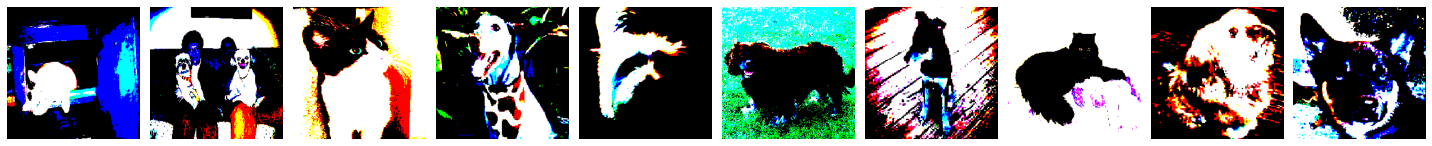

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [67]:
plotImages(imgs)
print(labels)

In [83]:
model=Sequential([
    Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2),strides=2),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
    MaxPool2D(pool_size=(2,2),strides=2),
    Flatten(),
    Dense(units=2,activation='softmax'),
    
])

In [84]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 401410    
Total params: 440,130
Trainable params: 440,130
Non-trainable params: 0
________________________________________________

In [85]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x=train_batch,validation_data=val_batch,epochs=10,verbose=2)

Epoch 1/10
100/100 - 37s - loss: 17.3993 - accuracy: 0.5430 - val_loss: 3.5640 - val_accuracy: 0.5450
Epoch 2/10
100/100 - 38s - loss: 0.8603 - accuracy: 0.8060 - val_loss: 1.7401 - val_accuracy: 0.6500
Epoch 3/10
100/100 - 40s - loss: 0.1181 - accuracy: 0.9490 - val_loss: 1.6159 - val_accuracy: 0.6150
Epoch 4/10
100/100 - 39s - loss: 0.0205 - accuracy: 0.9980 - val_loss: 1.5949 - val_accuracy: 0.6300
Epoch 5/10
100/100 - 39s - loss: 0.0078 - accuracy: 1.0000 - val_loss: 1.5344 - val_accuracy: 0.6450
Epoch 6/10
100/100 - 38s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.5789 - val_accuracy: 0.6200
Epoch 7/10
100/100 - 39s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.5946 - val_accuracy: 0.6250
Epoch 8/10
100/100 - 38s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.6163 - val_accuracy: 0.6400
Epoch 9/10
100/100 - 38s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.6352 - val_accuracy: 0.6350
Epoch 10/10
100/100 - 39s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.6522 - val_accur

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

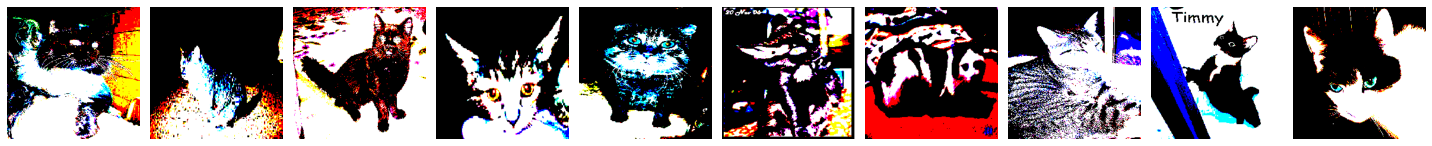

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [88]:
test_img,test_label=next(test_batch)
plotImages(test_img)
print(test_label)

In [87]:
predictions=model.predict(x=test_batch,verbose=0)
print(test_batch.classes)
print(tf.argmax(predictions,axis=-1))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
tf.Tensor(
[0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1
 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1
 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0], shape=(100,), dtype=int64)


In [89]:
cm=confusion_matrix(y_true=test_batch.classes,y_pred=np.argmax(predictions,axis=-1))

In [90]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Martix, W/O Normalization')
    print(cm)
    
    thresh=cm.max()/2
    for i ,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment='center',
                 color='white' if cm[i,j]>thresh else'black')
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel("Predict Label")

In [91]:
test_batch.class_indices

{'cat': 0, 'dog': 1}

Confusion Martix, W/O Normalization
[[36 14]
 [14 36]]


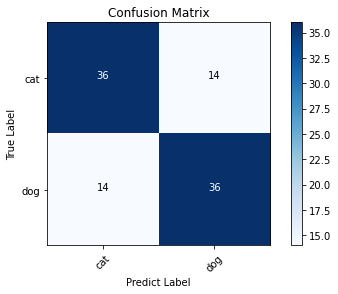

In [92]:
cm_plot_labels=['cat','dog']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

In [94]:
vgg16_model=tf.keras.applications.vgg16.VGG16()
vgg16_model.summary()

553467904/553467096 [==============================] - 348s 1us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
__________________________________________________________

In [98]:
def count_params(model):
    non_trainable_params=np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])
    trainable_params=np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    return {'non_trainable_params':non_trainable_params,'trainable_params':trainable_params}

In [99]:
params=count_params(vgg16_model)
assert params['non_trainable_params']==0 
assert params['trainable_params']==138357544

In [101]:
model=Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [102]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [104]:
for layer in model.layers:
    layer.trainable=False
model.add(Dense(units=2,activation='softmax'))

In [105]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [106]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [107]:
model.fit(x=train_batch,validation_data=val_batch,epochs=5,verbose=2)

Epoch 1/5
100/100 - 91s - loss: 0.3139 - accuracy: 0.8840 - val_loss: 0.1869 - val_accuracy: 0.9250
Epoch 2/5
100/100 - 90s - loss: 0.0882 - accuracy: 0.9720 - val_loss: 0.1268 - val_accuracy: 0.9600
Epoch 3/5
100/100 - 90s - loss: 0.0573 - accuracy: 0.9810 - val_loss: 0.1081 - val_accuracy: 0.9600
Epoch 4/5
100/100 - 90s - loss: 0.0405 - accuracy: 0.9900 - val_loss: 0.0936 - val_accuracy: 0.9650
Epoch 5/5
100/100 - 91s - loss: 0.0315 - accuracy: 0.9910 - val_loss: 0.0946 - val_accuracy: 0.9650


# Start Prediction

In [110]:
prediction=model.predict(x=test_batch,verbose=1)

10/10 [==============================] - 7s 658ms/step


In [111]:
test_batch.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [113]:
cm=confusion_matrix(y_true=test_batch.classes,y_pred=np.argmax(prediction,axis=-1))

In [115]:
test_batch.class_indices

{'cat': 0, 'dog': 1}

Confusion Martix, W/O Normalization
[[50  0]
 [ 0 50]]


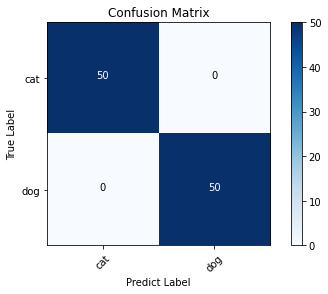

In [116]:
cm_plot_labels=['cat','dog']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')